In [1]:
# If not run as a makefile target, you can download and install the client:
# pip install https://ai-engine-manager-release.s3.amazonaws.com/latest-snapshot/downloads/h2o_engine_manager-0.2.0-py3-none-any.whl
import h2o_engine_manager
from h2o_engine_manager.clients.notebook_engine.engine import NotebookEngine


In [2]:
# Initialize AIEM clients.
aiem = h2o_engine_manager.login()
notebook_engine_client = aiem.notebook_engine_client
notebook_engine_profile_client = aiem.notebook_engine_profile_client
notebook_engine_image_client = aiem.notebook_engine_image_client


In [3]:
# List available profiles.
profiles = notebook_engine_profile_client.list_all_assigned_notebook_engine_profiles(parent="workspaces/global")
print("Profiles:")
for profile in profiles:
    print("\t", profile.name)


Profiles:
	 workspaces/global/notebookEngineProfiles/default


In [4]:
# List available images.
images = notebook_engine_image_client.list_all_notebook_engine_images(parent="workspaces/global")
print("Images:")
for image in images:
    print("\t", image.name)


Images:
	 workspaces/global/notebookEngineImages/cpu-kernel


In [11]:
# Create new Notebook engine.
# Use the first available profile and image from the lists above.
# Replace these with actual values from the previous cells if needed.
profile_name = profiles[0].name if profiles else "workspaces/global/notebookEngineProfiles/default"
image_name = images[0].name if images else "workspaces/global/notebookEngineImages/default"

engine = notebook_engine_client.create_notebook_engine(
    parent="workspaces/default",
    notebook_engine=NotebookEngine(
        profile=profile_name,
        notebook_image=image_name,
        display_name="My test Notebook engine",
        cpu=4,  # Minimum required
        gpu=0,
        memory_bytes="16Gi",  # Minimum required
        storage_bytes="64Gi",  # Minimum required
        max_idle_duration="1h",
        max_running_duration="1h",
    ),
    notebook_engine_id="test-notebook-engine"
)


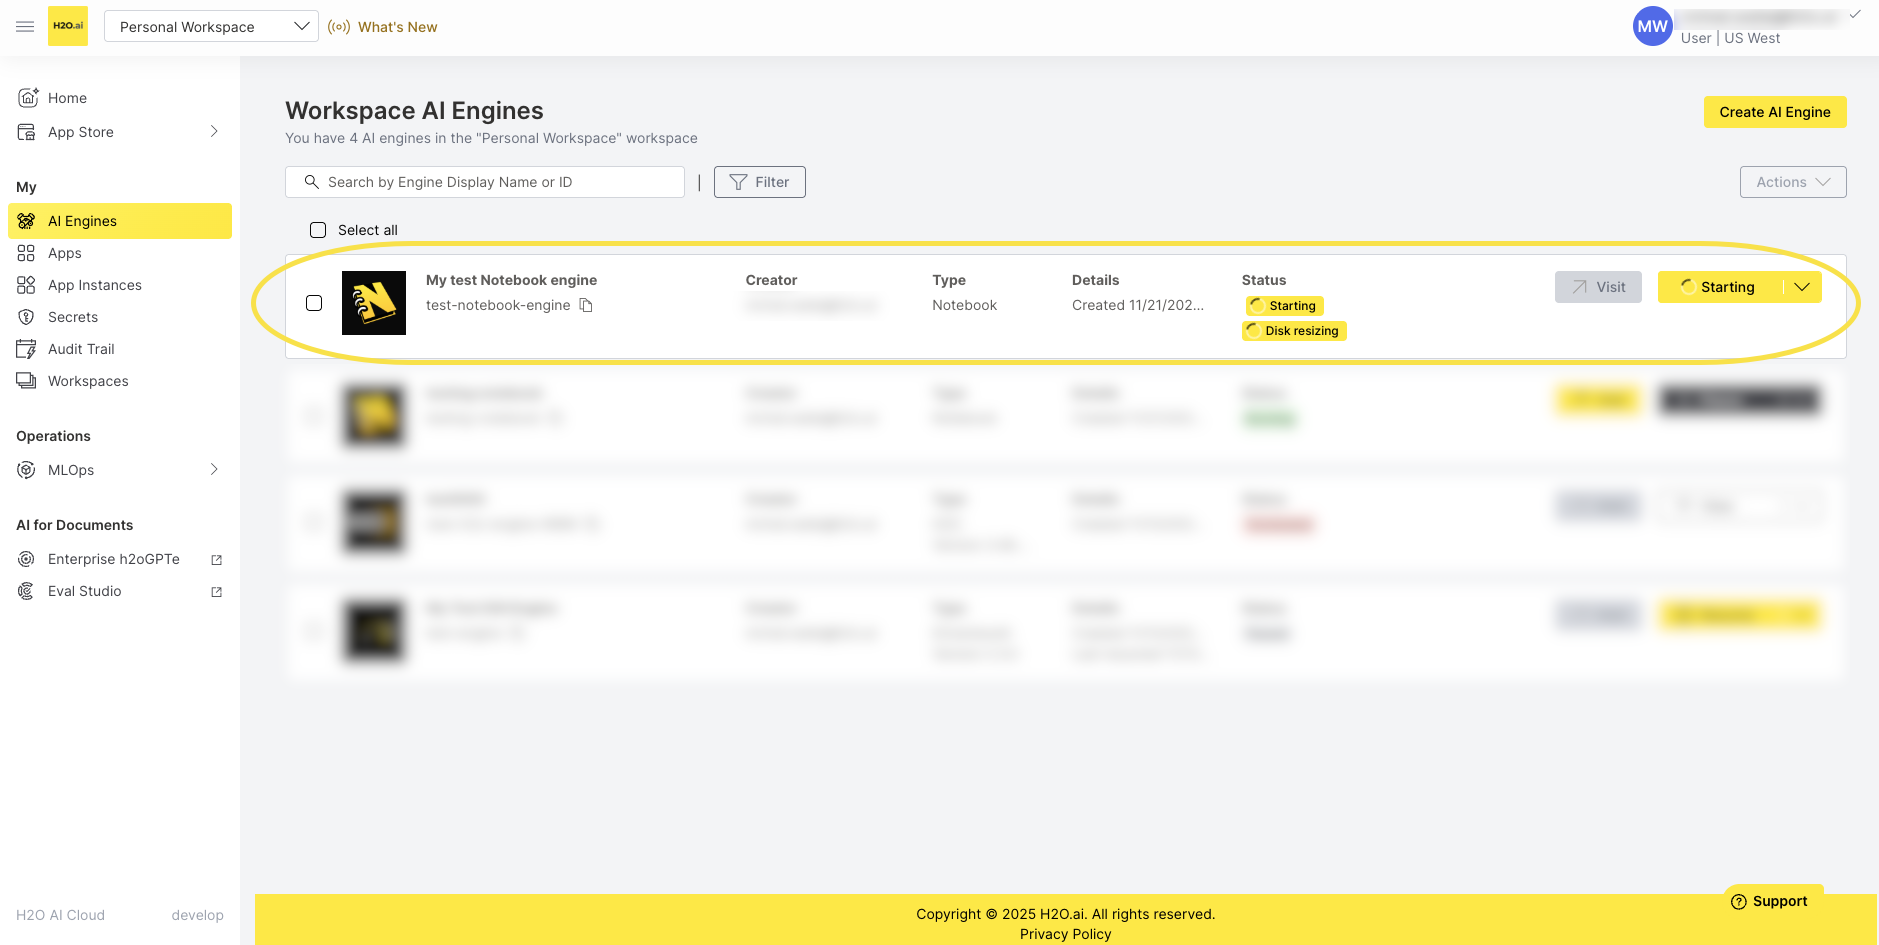

In [12]:
# Now wait for the engine to finish starting.
notebook_engine_client.wait(name=engine.name)
print(f"Engine is now in state: {engine.state}")

Engine is now in state: NotebookEngineState.STATE_STARTING


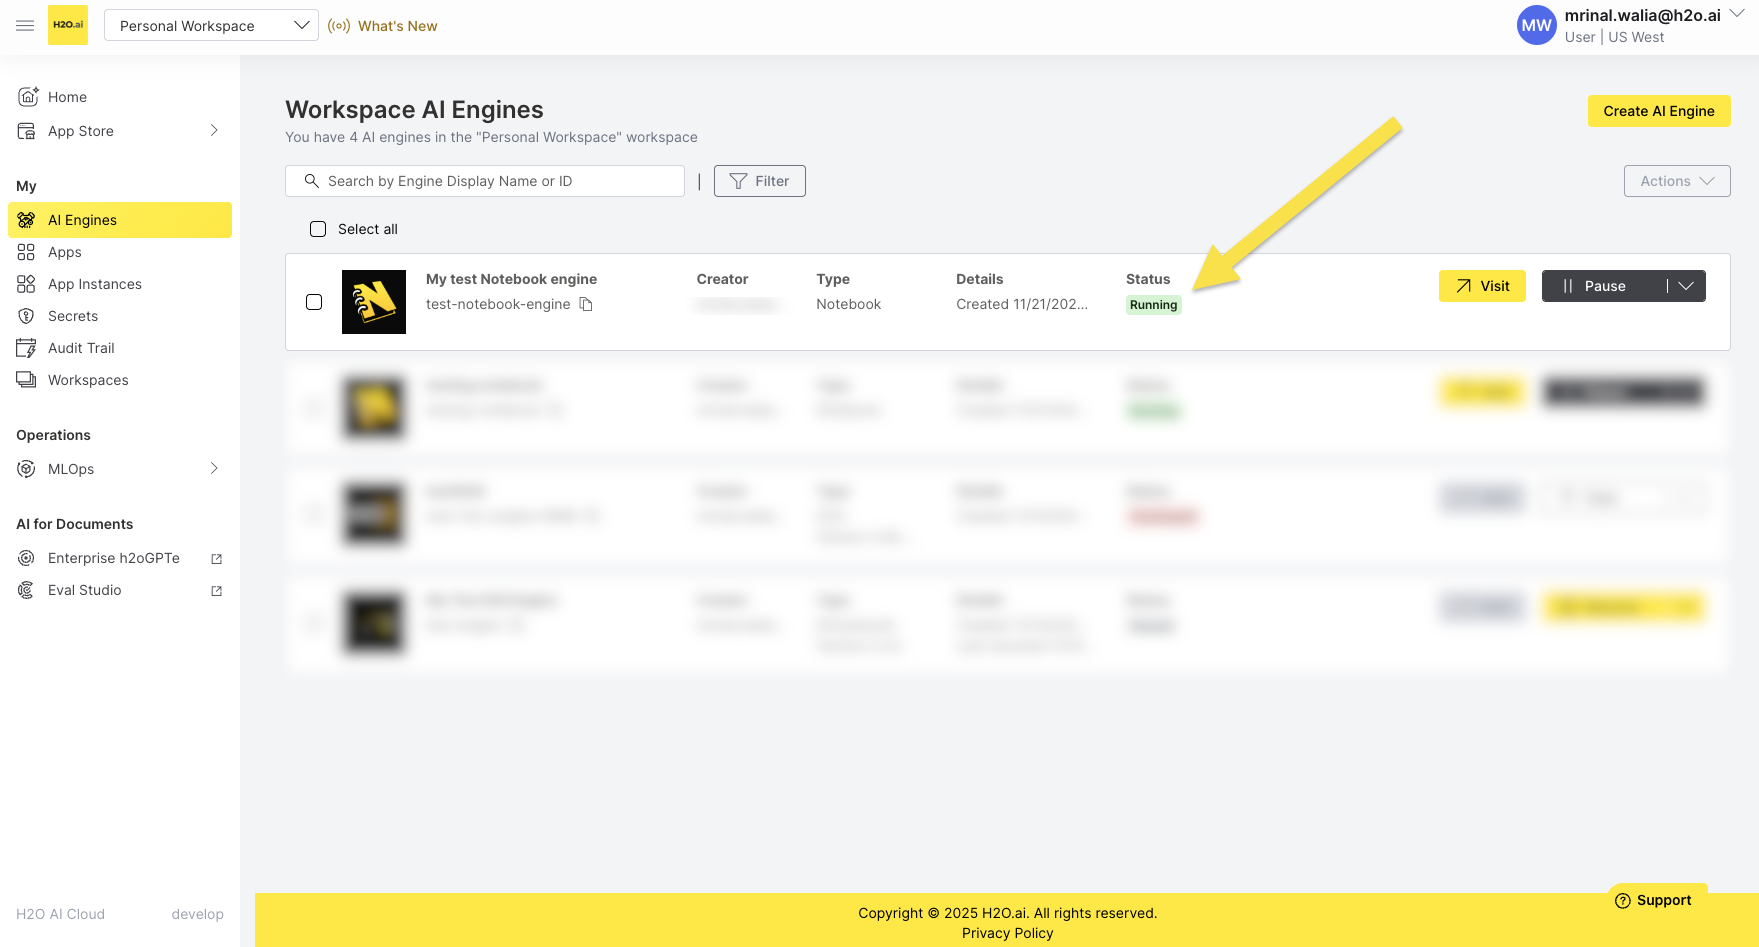

In [13]:
# Print access URI to open the notebook engine in browser.
access_uri = notebook_engine_client.access_notebook_engine(name=engine.name)
print("Notebook engine access URI:", access_uri)

Notebook engine access URI: https://enginemanager.dev.h2o.ai/workspaces/eccc2a35-b79b-4945-83be-a4ad20c56d9e/notebookEngines/test-notebook-engine/lab?token=KBYNGZE5VMT7MINKWTN252EHUM


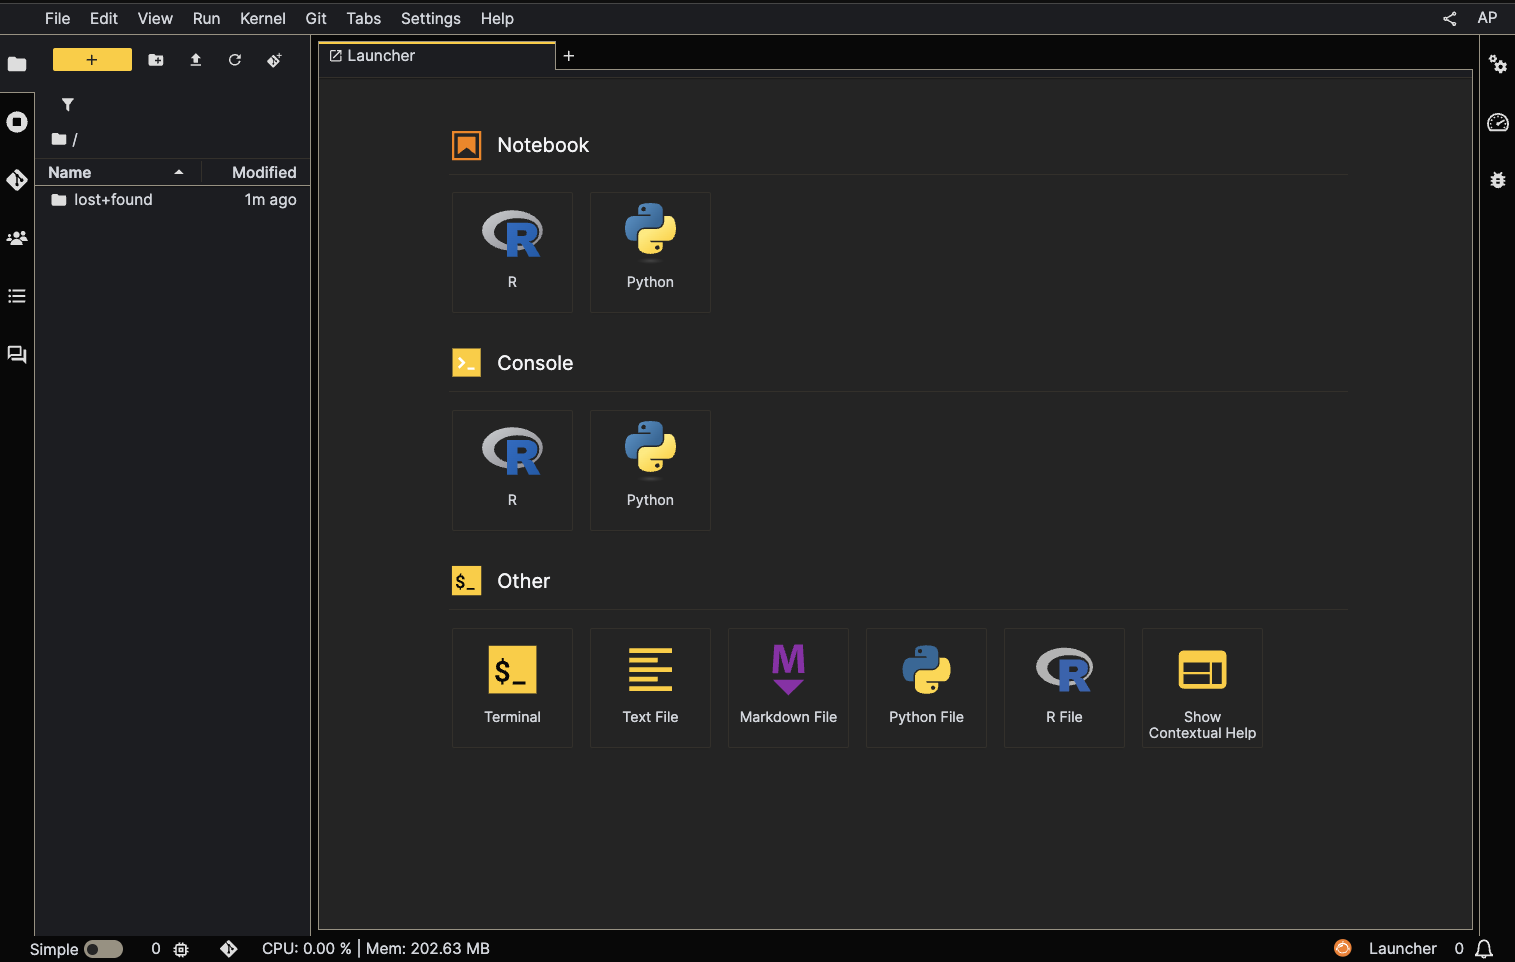

In [14]:
# Pause the engine.
notebook_engine_client.pause_notebook_engine(name=engine.name)
# Wait for engine to pause.
notebook_engine_client.wait(name=engine.name)
print(f"Engine is now in state: {engine.state}")

Engine is now in state: NotebookEngineState.STATE_STARTING


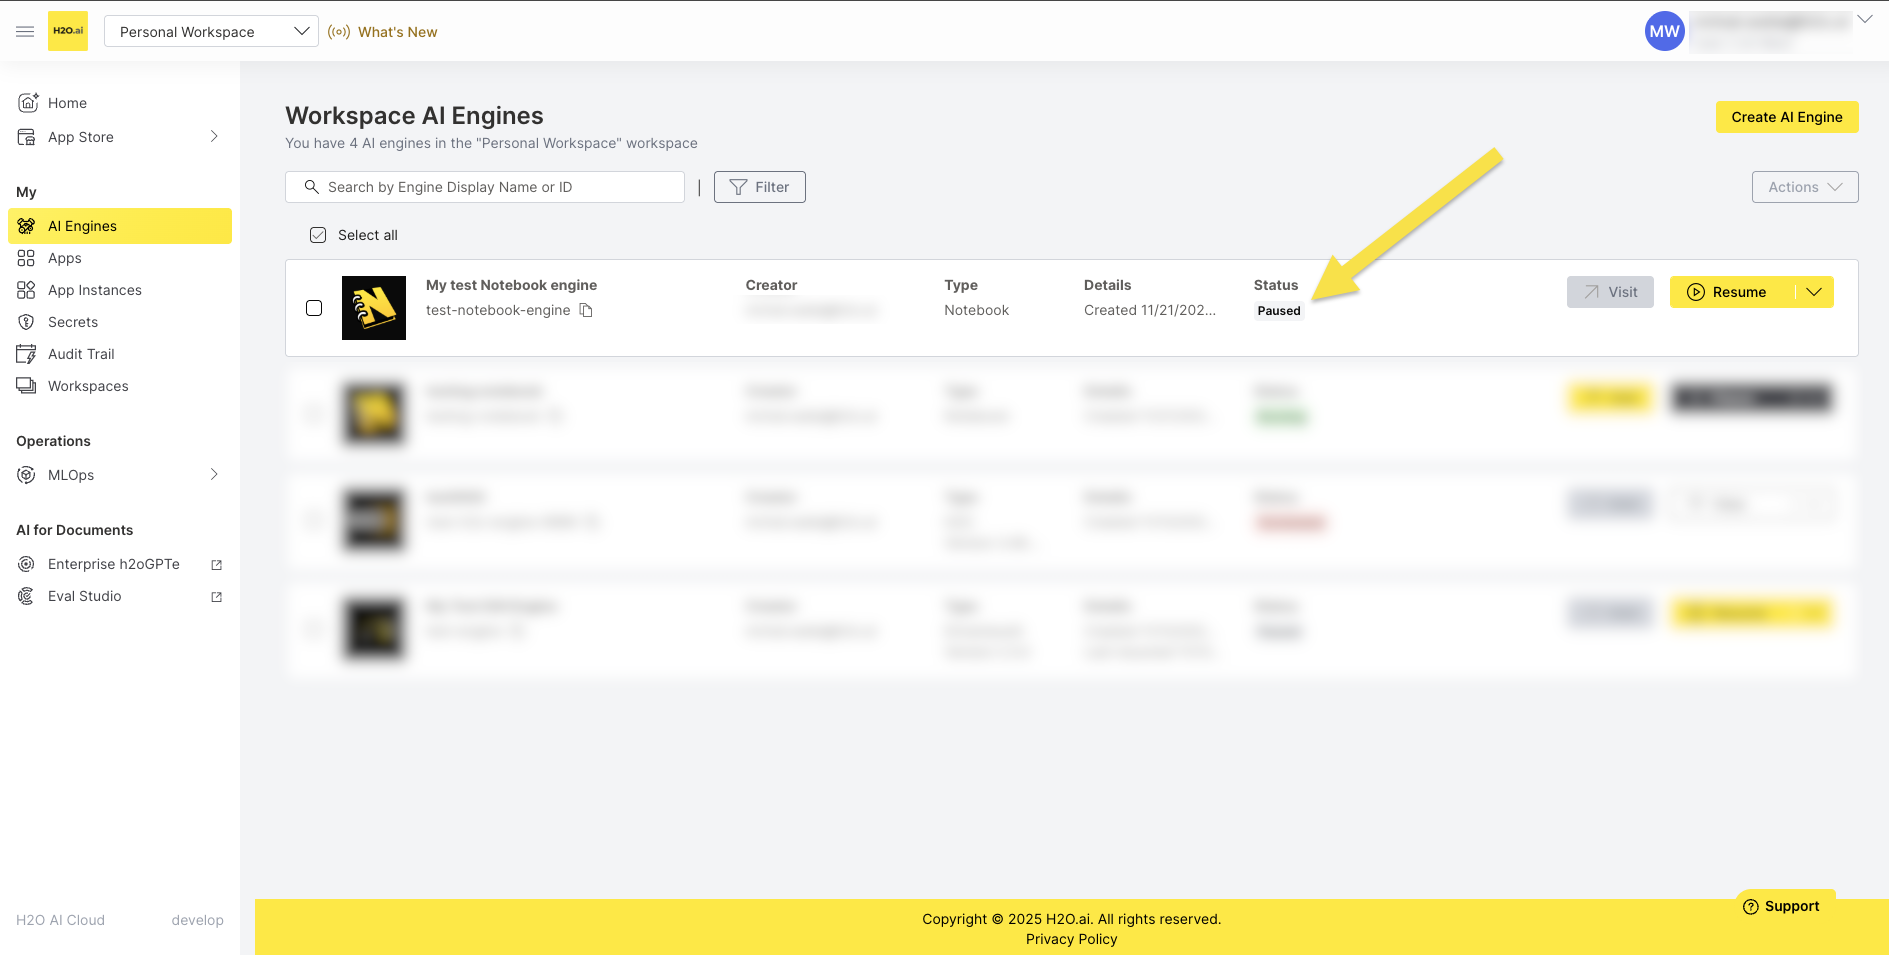

In [16]:
# Get the engine and update it with more memory.
engine = notebook_engine_client.get_notebook_engine(name=engine.name)
engine.memory_bytes = "32Gi"
engine.cpu = 8
notebook_engine_client.update_notebook_engine(notebook_engine=engine)


{'cpu': 8,
 'create_time': datetime.datetime(2025, 11, 21, 22, 27, 15, 451340, tzinfo=tzlocal()),
 'creator': 'users/1a64a6a4-f3ed-4ea1-b7b6-5f1fa52e2f1b',
 'creator_display_name': 'mrinal.walia@h2o.ai',
 'current_idle_duration': None,
 'current_running_duration': None,
 'delete_time': None,
 'display_name': 'My test Notebook engine',
 'failure_reason': <NotebookEngineFailureReason.FAILURE_REASON_UNSPECIFIED: 'FAILURE_REASON_UNSPECIFIED'>,
 'gpu': 0,
 'max_idle_duration': '1h',
 'max_running_duration': '1h',
 'memory_bytes': '32Gi',
 'name': 'workspaces/eccc2a35-b79b-4945-83be-a4ad20c56d9e/notebookEngines/test-notebook-engine',
 'notebook_image': 'workspaces/global/notebookEngineImages/cpu-kernel',
 'notebook_image_info': <h2o_engine_manager.clients.notebook_engine.notebook_engine_image_info.NotebookEngineImageInfo object at 0x7f586a472ad0>,
 'profile': 'workspaces/global/notebookEngineProfiles/default',
 'profile_info': <h2o_engine_manager.clients.notebook_engine.notebook_engine_profi

In [17]:
# Resume the engine again.
notebook_engine_client.resume_notebook_engine(name=engine.name)
# Wait for engine to finish starting.
notebook_engine_client.wait(name=engine.name)
print(f"Engine is now in state: {engine.state}")

Engine is now in state: NotebookEngineState.STATE_PAUSED


In [18]:
# List all notebook engines.
all_engines = notebook_engine_client.list_all_notebook_engines(parent="workspaces/default")
for eng in all_engines:
    print(f"Engine: {eng.display_name}, State: {eng.state}, CPU: {eng.cpu}, Memory: {eng.memory_bytes}")

Engine: My test Notebook engine, State: NotebookEngineState.STATE_RUNNING, CPU: 8, Memory: 32Gi
Engine: testing notebook, State: NotebookEngineState.STATE_RUNNING, CPU: 4, Memory: 14Gi


In [ ]:
# Resize storage (engine must be paused).
notebook_engine_client.pause_notebook_engine(name=engine.name)
notebook_engine_client.wait(name=engine.name)
notebook_engine_client.resize_notebook_engine_storage(
    name=engine.name,
    new_storage="16Gi"
)

In [19]:
# Delete the engine. You can `wait()` after, to wait for resources to be released.
notebook_engine_client.delete_notebook_engine(name=engine.name)
notebook_engine_client.wait(name=engine.name)
print(f"Engine is now in state: {engine.state}")

Engine is now in state: NotebookEngineState.STATE_PAUSED
